Q1: Number of books without an original title: 0
Q2: Number of unique books: 1703
Q3: Number of unique users: 52558
Q7: Book ID most marked 'to-read': 47
Q8: Least used tag ID: 78
Q9: Book with the lowest average rating: The Almost Moon
Q10: Book ID with least tag counts: 290039
Q11: Number of unique tags: 8330
Q14: Number of positive sentiment titles: 1532


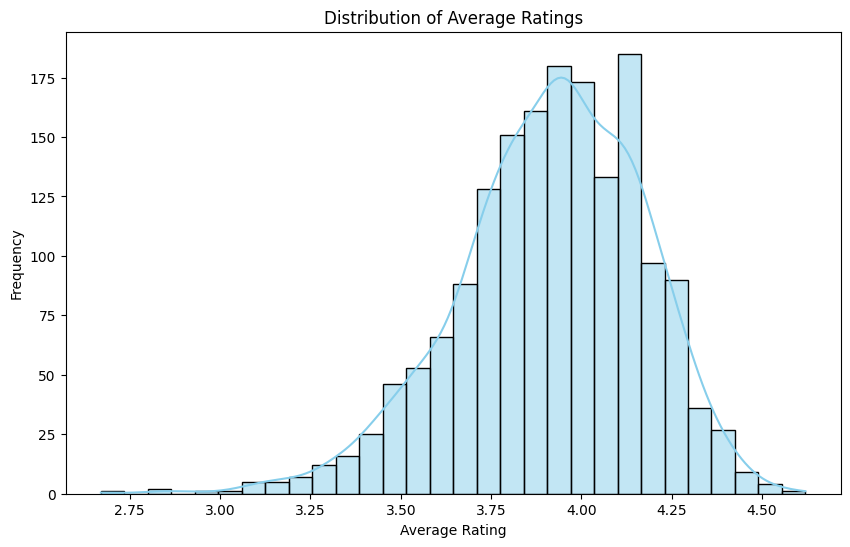

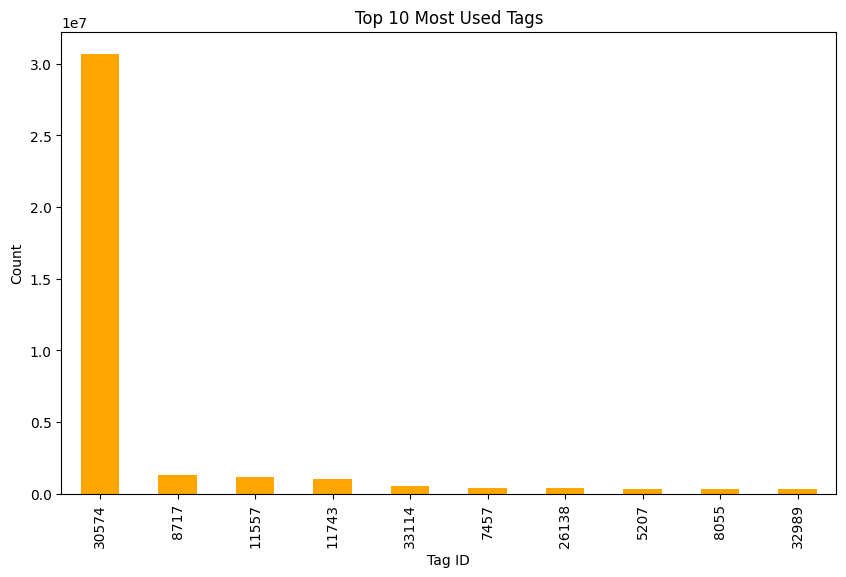

Q.15:Sentiment Metrics (Polarity and Subjectivity):
           original_title  polarity  subjectivity
0   To Kill a Mockingbird       0.0          0.00
1        The Great Gatsby       0.8          0.75
2  The Fault in Our Stars       0.0          0.00
3  The Catcher in the Rye       0.0          0.00
4        Angels & Demons        0.0          0.00
Q.16:


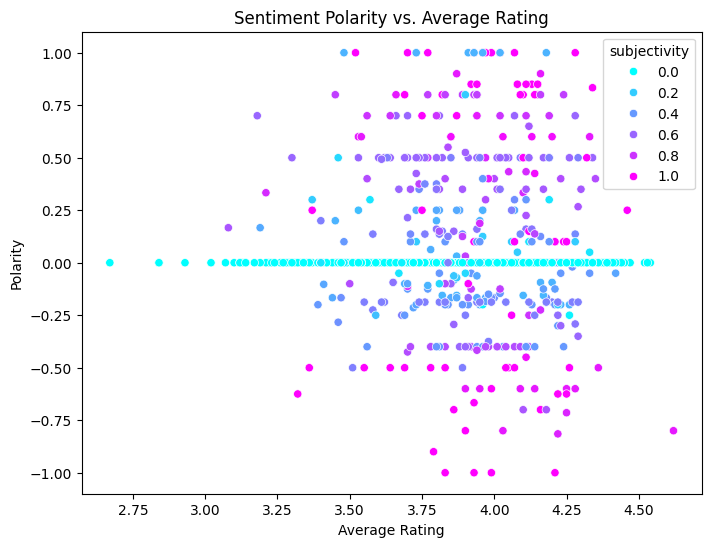

Q.17:


<ipython-input-4-773a1a6e5f8d>:96: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(books["polarity"], shade=True, color="blue", label="Polarity")
<ipython-input-4-773a1a6e5f8d>:97: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(books["subjectivity"], shade=True, color="red", label="Subjectivity")


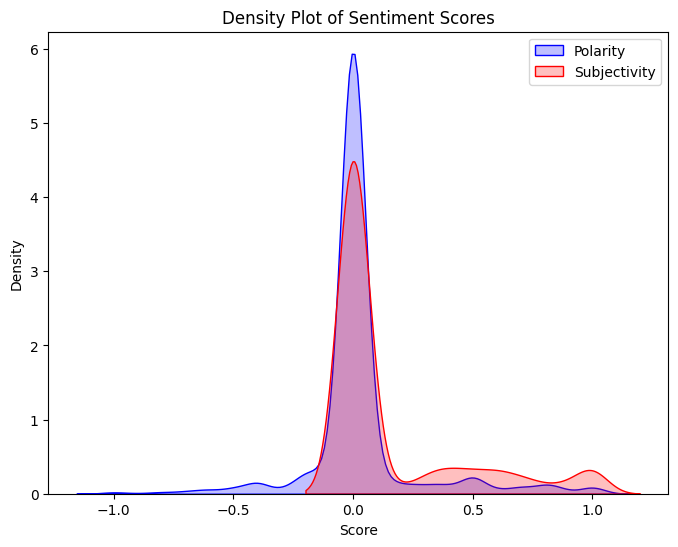

Q.18: Emotional Tone Distribution:
emotional_tone
Negative             1447
Positive              143
Strongly Positive      75
Strongly Negative      38
Name: count, dtype: int64
Q.19:


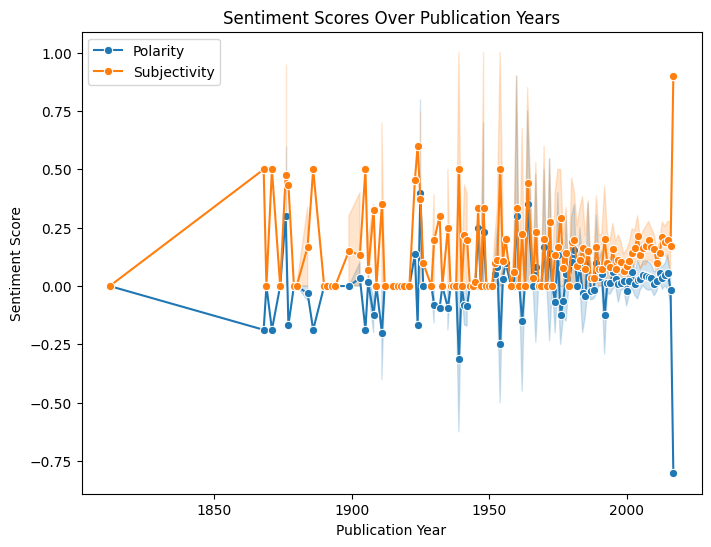

In [4]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load datasets
books = pd.read_csv('/content/books.csv')
ratings = pd.read_csv('/content/ratings.csv')
to_read = pd.read_csv('/content/toread.csv')
book_tags = pd.read_csv('/content/book_tags.csv')

# Data Cleaning
books.dropna(subset=['original_title'], inplace=True)

# Q1: Books without original titles
missing_titles = len(books[books['original_title'].isnull()])
print(f"Q1: Number of books without an original title: {missing_titles}")

# Q2: Unique books based on 'book_id'
unique_books = books['book_id'].nunique()
print(f"Q2: Number of unique books: {unique_books}")

# Q3: Unique users based on 'user_id'
unique_users = ratings['user_id'].nunique()
print(f"Q3: Number of unique users: {unique_users}")

# Q7: Most marked 'to-read' book
most_to_read = to_read['book_id'].value_counts().idxmax()
print(f"Q7: Book ID most marked 'to-read': {most_to_read}")

# Q8: Least used tag
least_used_tag = book_tags.groupby('tag_id')['count'].sum().idxmin()
print(f"Q8: Least used tag ID: {least_used_tag}")

# Q9: Book with minimum average rating
min_rating_book = books.loc[books['average_rating'].idxmin(), 'title']
print(f"Q9: Book with the lowest average rating: {min_rating_book}")

# Q10: Book with least user tag count
tag_counts = book_tags.groupby('goodreads_book_id')['count'].sum()
min_tag_count_book = tag_counts.idxmin()
print(f"Q10: Book ID with least tag counts: {min_tag_count_book}")

# Q11: Unique tags in the dataset
unique_tags = book_tags['tag_id'].nunique()
print(f"Q11: Number of unique tags: {unique_tags}")

# Q14: Positive sentiment titles using TextBlob
books['sentiment'] = books['original_title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
positive_titles = len(books[books['sentiment'] >= 0])
print(f"Q14: Number of positive sentiment titles: {positive_titles}")

# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(books['average_rating'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
top_tags = book_tags.groupby('tag_id')['count'].sum().nlargest(10)
top_tags.plot(kind='bar', color='orange')
plt.title("Top 10 Most Used Tags")
plt.xlabel("Tag ID")
plt.ylabel("Count")
plt.show()



# Filter non-null original titles
books = books[~books["original_title"].isnull()]
books["original_title"] = books["original_title"].astype(str)

# 15. Detailed Sentiment Metrics
books["polarity"] = books["original_title"].apply(lambda x: TextBlob(x).sentiment.polarity)
books["subjectivity"] = books["original_title"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

print("Q.15:Sentiment Metrics (Polarity and Subjectivity):")
print(books[["original_title", "polarity", "subjectivity"]].head())

# 16. Sentiment Trends by Popularity
books["average_rating"] = pd.to_numeric(books["average_rating"], errors="coerce")
plt.figure(figsize=(8, 6))
print("Q.16:")
sns.scatterplot(x="average_rating", y="polarity", data=books, hue="subjectivity", palette="cool")
plt.title("Sentiment Polarity vs. Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Polarity")
plt.show()

# 17. Clustering Sentiments (Polarity and Subjectivity Distribution)
print("Q.17:")
plt.figure(figsize=(8, 6))
sns.kdeplot(books["polarity"], shade=True, color="blue", label="Polarity")
sns.kdeplot(books["subjectivity"], shade=True, color="red", label="Subjectivity")
plt.title("Density Plot of Sentiment Scores")
plt.xlabel("Score")
plt.legend()
plt.show()

# 18. Emotional Tone Analysis
def emotional_tone(polarity):
    if polarity > 0.5:
        return "Strongly Positive"
    elif 0 < polarity <= 0.5:
        return "Positive"
    elif -0.5 < polarity <= 0:
        return "Negative"
    else:
        return "Strongly Negative"

books["emotional_tone"] = books["polarity"].apply(emotional_tone)
tone_distribution = books["emotional_tone"].value_counts()

print("Q.18: Emotional Tone Distribution:")
print(tone_distribution)

# 19. Time-based Sentiment Analysis
books["publication_year"] = pd.to_numeric(books["original_publication_year"], errors="coerce")
time_data = books.dropna(subset=["publication_year", "polarity"])
print("Q.19:")
plt.figure(figsize=(8, 6))
sns.lineplot(x="publication_year", y="polarity", data=time_data, marker="o", label="Polarity")
sns.lineplot(x="publication_year", y="subjectivity", data=time_data, marker="o", label="Subjectivity")
plt.title("Sentiment Scores Over Publication Years")
plt.xlabel("Publication Year")
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()


# Save cleaned data if needed
books.to_csv('cleaned_books.csv', index=False)
